<a href="https://colab.research.google.com/github/shalinikarthick/shalinikarthick/blob/main/shalini_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

**1st Jar of ML**

**DATA**

In [11]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [12]:
#df.columns
# column name replacement
dict = {'Chirps/Second': 'Chirps',
        'Ground Temperature': 'Temperature'}
 
# call rename () method
df.rename(columns=dict,
          inplace=True)
 
# print Data frame after rename columns
display(df)

,Chirps,Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


**I CLEANING:**

    **1. Missing data**
      a. impute (replace values with mean, median, mode)
      b. deletion

In [4]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

2. Duplicates (delete data)

In [5]:
df = df.drop_duplicates()
df.shape

(15, 2)

3. Outliers

In [7]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [8]:
df.shape


(15, 2)

In [13]:
df.Temperature.quantile(0.75)

83.4

In [15]:
iqr = df.Temperature.quantile(0.75) - df.Temperature.quantile(0.25)
upper_threshold = df.Temperature.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Temperature.quantile(0.25) - (1.5 * iqr)
upper_threshold

98.4

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data

5. Covert dtypes if it is not correct format

In [ ]:
df.dtypes

Chirps         float64
Temperature    float64
dtype: object

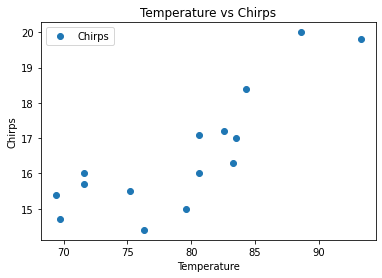

,Chirps,Temperature
Chirps,1.000000,0.832042
Temperature,0.832042,1.000000


In [ ]:
df.plot(x='Temperature', y='Chirps', style='o')
plt.title('Temperature vs Chirps')
plt.xlabel('Temperature')
plt.ylabel('Chirps')
plt.show()
df[['Chirps','Temperature']].corr()

There is a linear relationship between Chirps and Temperature

we can go ahead and develop a linear regression model.

 No transformation required.

In [ ]:
df.Chirps.values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

**2. Encoding**

 Here encoding is not needed, since the data is already numerical 

**3.SPLIT**

To split the data using sklearn model

train data (70 - 80)%

test data (20 - 30)%

In [16]:
X = df.loc[:, ['Temperature']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Chirps'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
y_test

array([17.2, 15.4, 15.5])

In [18]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

**4. NORMALISING/SCALING DATA**

Scaling is not mandatory for linear regression

**2nd Jar of ML**

**II TASK**

It is a** SUPERVISED** learning problem In general, prediction is to be done based on the target variable

**3rd Jar of ML**

**III MODEL**

In [20]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
print(regressor.intercept_)

-0.7763509241025481


In [22]:
print(regressor.coef_) 

[0.21777384]


In [23]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([17.21176853, 14.3371538 , 15.60024209])

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17.2,17.211769
1,15.4,14.337154
2,15.5,15.600242


**4th Jar of ML**

**IV. LOSS FUNCTION**

** Parameters can take "infinite" values (smart way to find parameter is Gradient Descent)
* Loss function is a formula to find, how far my predictions are from "true target value"

**5th Jar of ML**

**V LEARNING JAR**

1. Hit & Trial (Time consuming)
2. Gradient Descent 
    1. convex (function with "one" local minima), (GD work always)
    2. non - convex (function with "multiple" local minima), (GD may or may not work)

**6th Jar of ML**

**VI. EVALUATION METRIC**

* Formula used to find which model is "supervision model"
*** R2 score

In [25]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4430802836535196


**Since R2 score is 0.44, model is not so best.** 
**I have concluded after applying ML over here.**

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

**1st Jar of ML**

**DATA**

In [27]:
df = pd.read_fwf("brain_body.txt",sep= " ") # to read the dataset and it is in text format
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.shape

(62, 2)

**I CLEANING:**

    1. **Missing data**
      a. impute (replace values with mean, median, mode)
      b. deletion

In [28]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

2. Duplicates (delete data)

In [31]:
df = df.drop_duplicates()
df.shape

(62, 2)

**3. Outliers**

In [32]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [33]:
df.Brain.quantile(0.75)

48.2025

In [35]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)
lower_threshold

-70.80375000000001

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data

5. Covert dtypes if it is not correct format

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

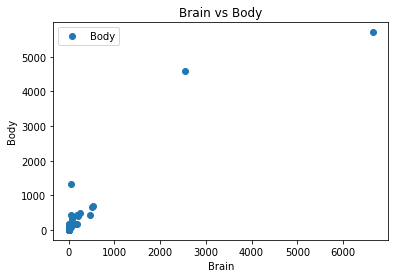

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
# to plot the data
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()
df[['Brain','Body']].corr()

There is a linear relationship between brain and body 

we can go ahead and develop a linear regression model. 

No transformation required.

In [36]:
df.Body.values

array([4.450e+01, 1.550e+01, 8.100e+00, 4.230e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       4.603e+03, 3.000e-01, 4.190e+02, 6.550e+02, 3.500e+00, 1.150e+02,
       2.560e+01, 5.000e+00, 1.750e+01, 6.800e+02, 4.060e+02, 3.250e+02,
       1.230e+01, 1.320e+03, 5.712e+03, 3.900e+00, 1.790e+02, 5.600e+01,
       1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01, 4.900e+02,
       1.210e+01, 1.750e+02, 1.570e+02, 4.400e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

**2. Encoding**

 Here encoding is not needed, since the data is already numerical 

**3.SPLIT**

To split the data using sklearn model

train data (70 - 80)%

test data (20 - 30)%

In [ ]:
X = df.loc[:, ['Brain']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Body'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_test

array([  6.4,  50.4, 406. ,   1. ,  21. , 119.5,   6.6,  25.6,  98.2,
       169. , 419. ,   2.5,   4. ])

In [ ]:
X_train.shape, X_test.shape

((49, 1), (13, 1))

4. **NORMALISING/SCALING DATA**

Scaling is not mandatory for linear regression

**2nd Jar of ML**

**II TASK**

It is a** SUPERVISED** learning problem In general, prediction is to be done based on the target variable

**3rd Jar of ML**

**III MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
print(regressor.intercept_)

-0.7763509241025481


In [38]:
print(regressor.coef_) 

[0.21777384]


In [39]:
regressor.predict([[0]])

array([-0.77635092])

In [40]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([17.21176853, 14.3371538 , 15.60024209])

In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,17.2,17.211769
1,15.4,14.337154
2,15.5,15.600242


In [42]:
regressor.predict([[9.5]])

array([1.29250059])

**4th Jar of ML**

**IV. LOSS FUNCTION**

** Parameters can take "infinite" values (smart way to find parameter is Gradient Descent)
* Loss function is a formula to find, how far my predictions are from "true target value"

**5th Jar of ML**

**V LEARNING JAR**

1. Hit & Trial (Time consuming)
2. Gradient Descent 
    1. convex (function with "one" local minima), (GD work always)
    2. non - convex (function with "multiple" local minima), (GD may or may not work)


**6th Jar of ML**

**VI. EVALUATION METRIC**

* Formula used to find which model is "supervision model"
*** R2 score

In [43]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4430802836535196


**Since R2 score is 0.44, model is not so best. **
**I have concluded after applying ML over here.**

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

**1st Jar of ML**

**DATA**

In [9]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


**I CLEANING:**

    **1. Missing data**
      a. impute (replace values with mean, median, mode)
      b. deletion

In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

2. **Duplicates (delete data)**

In [ ]:
df = df.drop_duplicates()
df.shape

(52, 6)

3. **Outliers**

In [10]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [12]:
df.Sex.quantile(0.75)

1.0

In [14]:
iqr = df.Sex.quantile(0.75) - df.Sex.quantile(0.25)
upper_threshold = df.Sex.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Sex.quantile(0.25) - (1.5 * iqr)
#lower_threshold
upper_threshold

2.5

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data

In [19]:
iqr = df.Rank.quantile(0.75) - df.Rank.quantile(0.25)
upper_threshold = df.Rank.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Rank.quantile(0.25) - (1.5 * iqr)
#lower_threshold
upper_threshold

6.0

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data

In [20]:
iqr = df.Year.quantile(0.75) - df.Year.quantile(0.25)
upper_threshold = df.Year.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Year.quantile(0.25) - (1.5 * iqr)
#lower_threshold
upper_threshold

23.0

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data

In [21]:
iqr = df.Degree.quantile(0.75) - df.Degree.quantile(0.25)
upper_threshold = df.Degree.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Degree.quantile(0.25) - (1.5 * iqr)
#lower_threshold
upper_threshold

2.5

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data

In [22]:
iqr = df.YSdeg.quantile(0.75) - df.YSdeg.quantile(0.25)
upper_threshold = df.YSdeg.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.YSdeg.quantile(0.25) - (1.5 * iqr)
#lower_threshold
upper_threshold

48.0

values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier

No skew in data

5. Covert dtypes if it is not correct format

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

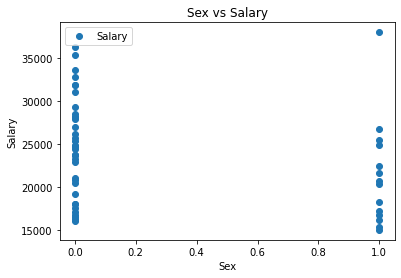

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [23]:
#plot the data
import numpy as np
df['transformed'] = np.exp(df['Sex'])
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

1) There is no linear relationship between Sex and Salary 

2) Have tried all trasnformations - still not able to see a good linear relationship 

3) Decided to drop the feature

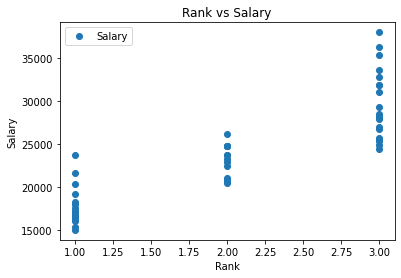

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
import numpy as np
df['transformed'] = np.exp(df['Rank'])
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

1) High correlation between the data

2) No transformation reqd

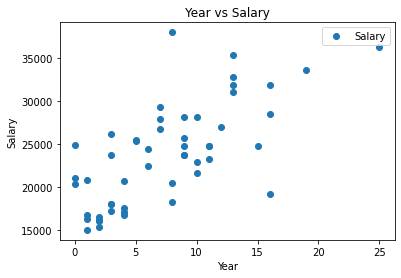

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

1) High correlation between the data

 2) No transformation reqd

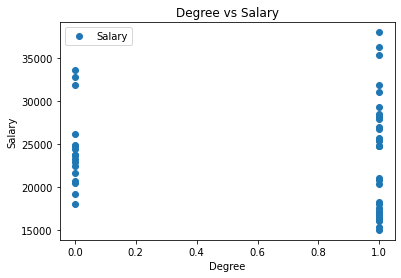

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
import numpy as np
df['transformed'] = np.exp(df['Degree'])
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

1) There is no linear relationship between Degree and Salary

2) Have tried all trasnformations - still not able to see a good linear relationship

3) Have decided to drop the feature

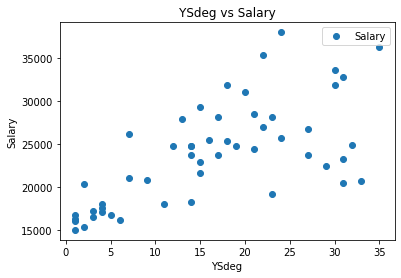

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

1) High correlation between the data 

2) No transformation reqd

**2. Encoding**

 Here encoding is not needed, since the data is already numerical 

**3.SPLIT**

To split the data using sklearn model

train data (70 - 80)%

test data (20 - 30)%

In [25]:
X = df[['Rank', 'Year', 'YSdeg']].values #array of features (Degree and Sex are eliminated)
y = df['Salary'].values #array of targets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**4. NORMALISING/SCALING DATA**

Scaling is not mandatory for linear regression

In [27]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**2nd Jar of ML**

**II TASK**

It is a** SUPERVISED** learning problem In general, prediction is to be done based on the target variable

**3rd Jar of ML**

**III MODEL**

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
coeff_df = pd.DataFrame(regressor.coef_,['Rank', 'Year',
       'YSdeg'], columns=['Salary'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Salary
Rank,4652.771917
Year,2214.533619
YSdeg,-498.309852


In [31]:
regressor.intercept_ 

23655.90243902439

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,22085.711958
1,17095,17260.333194
2,24750,26335.037263
3,22450,22243.607010
4,28200,29505.964712
5,21600,19146.986301
6,18075,16858.620843
7,23713,18792.875859
8,24800,24966.197403
9,33696,32788.162509


**4th Jar of ML**

**IV. LOSS FUNCTION**

** Parameters can take "infinite" values (smart way to find parameter is Gradient Descent)

Loss function is a formula to find, how far my predictions are from "true target value"

**5th Jar of ML**

**V LEARNING JAR**

Hit & Trial (Time consuming)
Gradient Descent
convex (function with "one" local minima), (GD work always)
non - convex (function with "multiple" local minima), (GD may or may not work)

**6th Jar of ML**

**VI. EVALUATION METRIC **

Formula used to find which model is "supervision model"
** R2 score

In [33]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7012109096135274


Since **R2 score is 0.70,** and the model is best model. 

I have concluded after applying ML over here.

** **Selection of Column with best R2 score**
**is (Year, Rank, YSdeg) **

** **Sex is not a factor in salary.txt file.**
